In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./test.csv")

In [3]:
df.head()

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False


In [4]:
df.columns

Index(['Unnamed: 0', 'Birth Weight', 'Gestational Days', 'Maternal Age',
       'Maternal Height', 'Maternal Pregnancy Weight', 'Maternal Smoker'],
      dtype='object')

In [5]:
df.shape

(1174, 7)

### Lets consider attributes Maternal smoker and Bith Weight

In [6]:
df.drop(
    ['Unnamed: 0','Gestational Days', 'Birth Weight', 'Maternal Height', 'Maternal Pregnancy Weight'],
    axis= 1,
    inplace= True
)

df.head()

,Maternal Age,Maternal Smoker
0,27,False
1,33,False
2,28,True
3,23,True
4,25,False


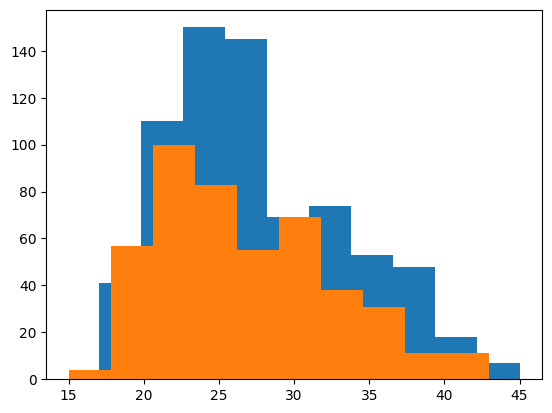

In [7]:
plt.hist(df[df['Maternal Smoker'] == False]['Maternal Age'])
plt.hist(df[df['Maternal Smoker'] == True]['Maternal Age'])
plt.show()

## 1.

As we can see the blue histogram is of the Mothers who do not smoke (Maternal smoker == False)
and the other one is of who smoke (Maternal smoker == True)

clearly we can see there is a weight difference of the children born to non smokers and smokers

## 2.

We have to see if the maternal age of smokers and non smokers are different or same  
Inshort we have to see if the weights are being affected by the fact that the mother was a smoker or non smoker  
So we can use AB tesing to test this

## 3.

**Null hypothesis :** The smoking doesn't affect the age and the difference is due to chance  
**Alternate Hypothesis :** The smoking affects the maternal age, hence the age difference

## 4.

We can use two tailed test to compare if the out observerd statistic is significant when compared to the sample distribution

## 5.

The observerd statistic is the difference between means of the ages of mother who smoke and do not smoke

In [8]:
mean_table = df.groupby('Maternal Smoker').mean()
mean_table

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


In [9]:
observered_statistic = mean_table['Maternal Age'][True] - mean_table['Maternal Age'][False]
observered_statistic

-0.8076725017901509

## 6.

If we assume the null hypothesis is true, then the fact that mother smokes or not smokes doesn't matter to the baby's weight  
So we shuffle the weights of babies among the mothers and then see the weight differences

In [10]:
shuffle = df.sample(df.shape[0], replace= False)
shuffle

,Maternal Age,Maternal Smoker
1045,37,False
779,23,True
1141,32,False
133,30,False
384,19,False
...,...,...
205,20,True
1047,18,True
1149,33,True
660,23,False


In [11]:
shuffleDF = shuffle.drop(['Maternal Smoker'], axis= 1).assign(shuffled_maternal_smoker= df['Maternal Smoker'].values)
shuffleDF.head()

,Maternal Age,shuffled_maternal_smoker
1045,37,False
779,23,False
1141,32,True
133,30,True
384,19,False


In [12]:
shuffled_mean_table = shuffleDF.groupby('shuffled_maternal_smoker').mean()
shuffled_mean_table

,Maternal Age
shuffled_maternal_smoker,
False,27.283916
True,27.141612


In [13]:
differnce = shuffled_mean_table['Maternal Age'][False] - shuffled_mean_table['Maternal Age'][True]
differnce

0.14230388348035206

### Simulating 1000 times:

In [14]:
diffs = []

for i in range(1000):
    shuffle = df.sample(df.shape[0], replace= False)
    shuffleDF = shuffle.drop(['Maternal Smoker'], axis= 1).assign(shuffled_maternal_smoker= df['Maternal Smoker'].values)
    shuffled_mean_table = shuffleDF.groupby('shuffled_maternal_smoker').mean()
    diffs.append(shuffled_mean_table['Maternal Age'][False] - shuffled_mean_table['Maternal Age'][True])

diffs[:5]

[0.4249066837302138,
 -0.748431524902113,
 0.04929536694242387,
 0.27466215701510066,
 -0.8199765376235959]

### 7.
Constructing histogram:

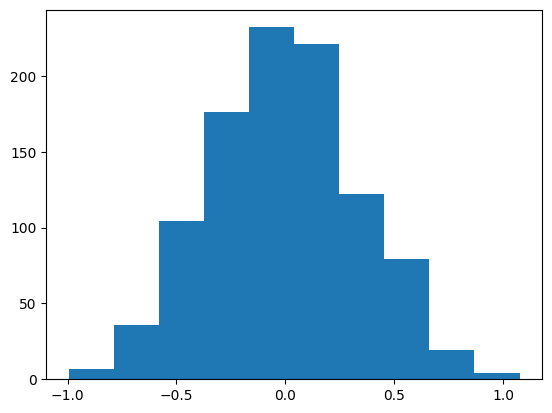

In [15]:
plt.hist(diffs)
plt.show()

### 8.
P-value

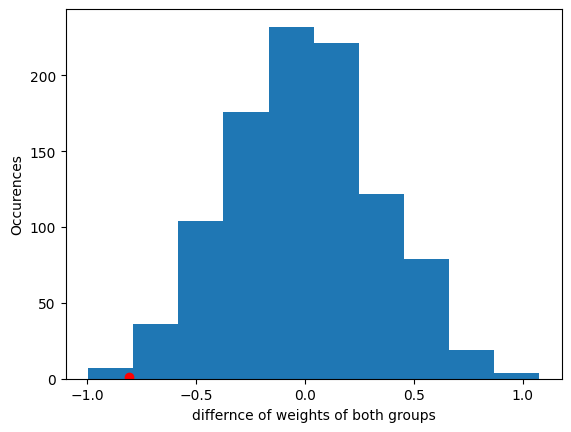

In [16]:
plt.hist(diffs)
plt.xlabel("differnce of weights of both groups")
plt.ylabel("Occurences")
plt.scatter(observered_statistic, 1, color='red')
plt.show()

In [17]:
import numpy as np

In [18]:
mu = np.mean(diffs)
std = np.std(diffs)

In [19]:
from scipy import stats as st

In [20]:
diffs = np.array(diffs)

In [21]:
observered_statistic

-0.8076725017901509

In [22]:
np.count_nonzero(diffs<=observered_statistic)/df.size

0.002555366269165247

P value is very less so we can reject null hypothesis, so we can say that age is affected by smoking